In [10]:
import numpy as np
import matplotlib.pyplot as plt

def newtonsMethod(interval, guess, f, h, maxIterations = 10, samples = None, debug = False):
    '''
    newtonsMethod - finds the root of f through estimation via evaluation of
    the tangent lines of that function.
    f - The function to evaluate, g'(x)  (must be callable)
    h - The callable version of g'/g''  (must be callable)
    interval - The interval upon which f() is continuously differentiable.
    guess - An initial starting point
    maxIterations - The number of times to iterate, or loop, looking for the root
    '''
    if not callable(f) or not callable(h):
        raise ValueError("f and/or h must be callable objects")
    if not interval[0] <= guess <= interval[1]:
       
        raise ValueError("Initial guess lies outside of the provided interval")
        
    iteration = 0

    # Contains a list of tuples which may be treated as x,y pairs
    pointsList = []
    x = guess
    while iteration < maxIterations:
        y = f(x) if samples is None else f(samples, x)
        if debug == True: print("DEBUG: x={}, y={}".format(x, y))
        #if np.isclose(y, 0.0, atol = 1e-2):
        if np.isclose(y, 0.0):
            break
        elif iteration >= maxIterations:
            raise ArithmeticError("No root found for f within max iterations")

        pointsList.append((x, y))
        x = x + h(x) if samples is None else h(samples, x)
        if x < interval[0] or x > interval[1]:
            raise ValueError("There is no solution in this interval")
        iteration += 1

    # If we got here, a root was found
    root = x
    return [(root, iteration), pointsList]


In [11]:
# Problem 1.a: find the root and print it with iterations
gp = lambda x: (1 + (1 / x) - np.log(x))/(1 + x)**2

# Fortunately, the textbook author was kind enough to provide this
h = lambda x: ((x + 1)*(1 + (1 / x) - np.log(x)))/(3 + (4 / x) + (1 / x)**2 - 2 * np.log(x))

print("Looking for the maximum value of g(x) = log(x)/(1 + x)")

retList = newtonsMethod([2, 4], 3.8, gp, h, debug=True)
rootTuple = retList[0]

print("Initial guess of 3.8")
print("The root of g'(x) is: {:.5f}".format(rootTuple[0]))
print("Root found in {} iterations".format(rootTuple[1]))


retList = newtonsMethod([2, 4], 3.0, gp, h)
rootTuple = retList[0]

print("Initial guess of 3.0")
print("The root of g'(x) is: {:.5f}".format(rootTuple[0]))
print("Root found in {} iterations".format(rootTuple[1]))

Looking for the maximum value of g(x) = log(x)/(1 + x)
DEBUG: x=3.8, y=-0.003118193228971265
DEBUG: x=3.5624825303547176, y=0.0004921871431943754
DEBUG: x=3.5906303622784677, y=8.29722311930796e-06
DEBUG: x=3.591121330729481, y=2.464863353487325e-09
Initial guess of 3.8
The root of g'(x) is: 3.59112
Root found in 3 iterations
Initial guess of 3.0
The root of g'(x) is: 3.59112
Root found in 4 iterations


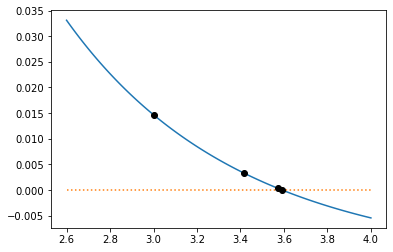

In [5]:
# Problem 1.b: produce graph similar to that of Figure 2.3
gp = lambda x: (1 + (1 / x) - np.log(x))/(1 + x)**2
x = np.linspace(2.6, 4, 100)
y = gp(x)
zero = np.zeros(len(x))

points = retList[1]
pointsAsArgs = ["{}, {}, 'ko'".format(x,y) for x, y in points]

# Now plot the stuff
plt.plot(x, y, x, zero, ':')
eval("plt.plot({}, {}, {}, {})".format(*pointsAsArgs))
plt.show()

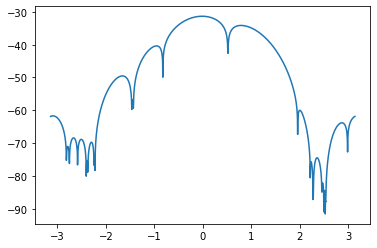

In [6]:
# Page 54, Problem 2.2(a): Graph log likelihood on [-pi, pi]
# Using the given function, log(L) = n*log(1/(2*pi)) + n*log(1-cos(x-th))
n = 1500
logLikely = lambda x, th_i: np.sum(np.log((1 - np.cos(x - th_i))/(2*np.pi)))
theta = np.linspace(-np.pi, np.pi, n)
obs = [3.91, 4.85, 2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96, 2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52, 2.50]
y = [logLikely(obs, t) for t in theta]

plt.clf()
plt.plot(theta, y)
plt.show()

In [7]:
# Pg 54, Problem 2.2(b): Find method of moments estimator
# after some working through an integral, and a former solution to this problem
# from online, I arrived at this value
estimator = lambda x: np.arcsin(np.pi - x)
# Get sample mean or x-bar
sampleMean = np.sum(obs) / len(obs)
estimatedTheta = estimator(sampleMean)
print("Estimate for theta = {}".format(estimatedTheta))


Estimate for theta = -0.05844060614042408


In [29]:
# Pg 54, Problem 2.2(c): Find maximum using Newton Raphson method
lp = lambda x, th_i: -(np.sum(np.sin(x - th_i)/(1 - np.cos(x - th_i))))
lpp = lambda x, th_i: -(np.sum(1/(1 - np.cos(x - th_i))))
h = lambda x, th_i: lp(x, th_i)/lpp(x, th_i)

# Getting maxima on [-0.7, 0.1]
values = newtonsMethod([-0.7, 0.1], estimatedTheta, lp, h, samples = obs, maxIterations = 20)
print("maximum {}; iteration {}".format(values[0][0], values[0][1]))

DEBUG: x=-0.05844060614042408, y=1.0067928554311596
DEBUG: x=-0.04705558412217159, y=0.7625718388987404
DEBUG: x=-0.03545234630786242, y=0.5122110317352777
DEBUG: x=-0.02366136546260661, y=0.2560247804351568
DEBUG: x=-0.011738283099532789, y=-0.005141788014585258
maximum -0.011738283099532789; iteration 4
